# Use K Means Clustering for Unsupervised Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Generate  random blobs of points by determining number of clusters and plot it out to visualize.

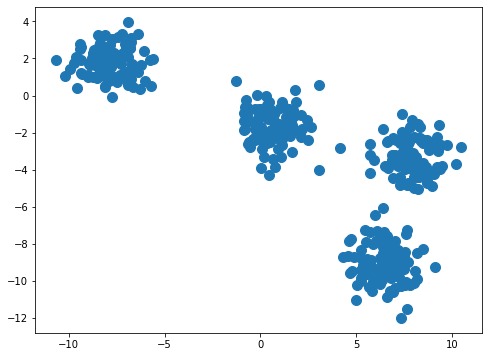

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=1.0, random_state=6)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=100);

Import scikit learn's K Means clustering algorithm and train the model.

In [3]:
from sklearn.cluster import KMeans 

In [4]:
num_clusters = 4
model = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Perform the prediction by using the trained model.

In [5]:
# Step size of the mesh 
step_size = 0.01 
 
# Plot the Decision Boundaries 
x_min, x_max = min(X[:, 0]) - 1, max(X[:, 0]) + 1 
y_min, y_max = min(X[:, 1]) - 1, max(X[:, 1]) + 1 
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size)) 
 
# Predict labels for all points in the mesh 
predictions = model.predict(np.c_[x_values.ravel(), y_values.ravel()]) 

Draw the ground truth and draw the predictions by using decision boundaries to represent the respective clusters.

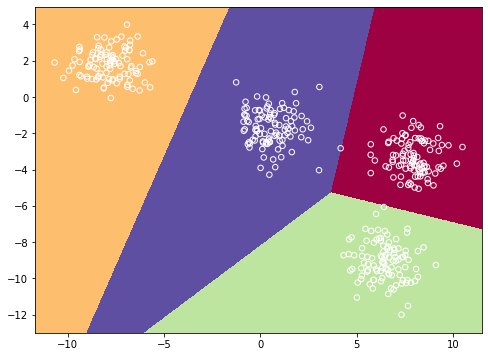

In [6]:
# Plot the results 
predictions = predictions.reshape(x_values.shape) 
plt.figure(figsize=(8,6)) 
plt.imshow(predictions, interpolation='nearest', 
           extent=(x_values.min(), x_values.max(), y_values.min(), y_values.max()), 
                 cmap=plt.cm.Spectral, aspect='auto', origin='lower') 
 
plt.scatter(X[:,0], X[:,1], marker='o', 
    facecolors='none', edgecolors='w', s=30) 

Draw the centroids by using model.**cluster_centers_**.

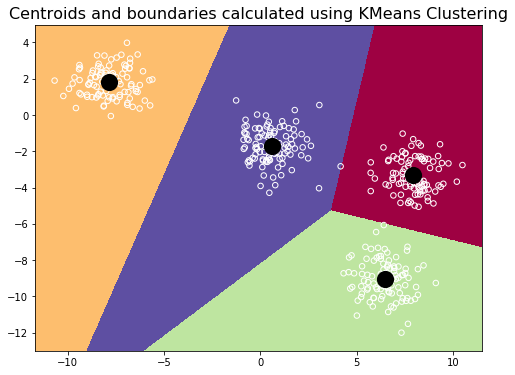

In [7]:
# Plot the boundaries 
predictions = predictions.reshape(x_values.shape) 
plt.figure(figsize=(8,6)) 
plt.imshow(predictions, interpolation='nearest', 
           extent=(x_values.min(), x_values.max(), y_values.min(), y_values.max()), 
                 cmap=plt.cm.Spectral, aspect='auto', origin='lower') 
 
plt.scatter(X[:,0], X[:,1], marker='o', 
    facecolors='none', edgecolors='w', s=30) 

# Plot the centroids of the clusters
centroids = model.cluster_centers_ 
plt.scatter(centroids[:,0], centroids[:,1], marker='o', s=200, linewidths=3, 
        color='k', zorder=10, facecolors='black') 
x_min, x_max = min(X[:, 0]) - 1, max(X[:, 0]) + 1 
y_min, y_max = min(X[:, 1]) - 1, max(X[:, 1]) + 1 
plt.title('Centroids and boundaries calculated using KMeans Clustering',fontsize=16) 
plt.xlim(x_min, x_max) 
plt.ylim(y_min, y_max) 
plt.show() 

Take note of the **inertia_** which is the **sum of squared distance from each point to their corresponding center**.

In [8]:
model.inertia_

738.109045275572

In [9]:
k_values = np.arange(2,10)
inertia = []
for k in k_values:
    model = KMeans(init='k-means++', n_clusters=k, n_init=10)
    model.fit(X)
    inertia.append(model.inertia_)
    

Text(0, 0.5, 'Inertia')

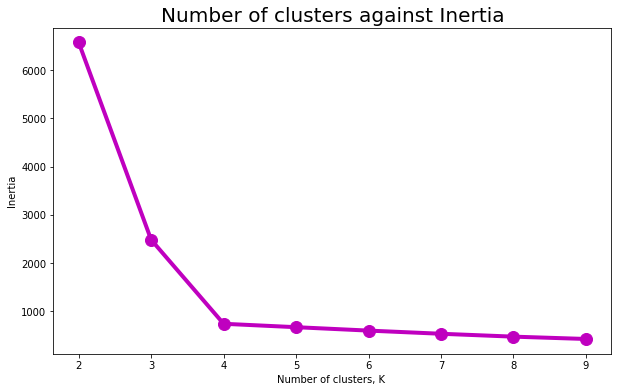

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(k_values,inertia,"o-m",linewidth=4, markersize=12)
plt.title("Number of clusters against Inertia",fontsize=20)
plt.xlabel("Number of clusters, K ")
plt.ylabel("Inertia")

By following the elbow rule, we will choose 4 as our number of clusters(K). If we choose 5 or more, the inertia would not decrease significantly. 